In [1]:
# Fun logistic regression algorithm
import numpy as np
import torch
from torch import nn
import torch.optim as optim

In [2]:
x = torch.rand(100,5)
y = torch.from_numpy(np.random.choice([-1,1],100))

In [3]:
xTr = x[:80,:]
yTr = y[:80]
xTe = x[80:,:]
yTe = y[80:]

In [4]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(5,1), requires_grad = True)
        self.b = nn.Parameter(torch.randn(1), requires_grad = True)
    
    def forward(self,x):
        
        return x @ self.w + self.b
        
#         loss = torch.sum(torch.log(1+torch.exp(-y*(x@self.w +self.b))))
#         return loss
        

In [5]:
model = LogReg()

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([[-1.2172],
         [-1.6735],
         [-0.7582],
         [ 0.0667],
         [-0.5052]], requires_grad=True),
 Parameter containing:
 tensor([0.7689], requires_grad=True)]

In [7]:
train_losses = []
val_losses = []

In [8]:
num_epochs = 25000
model = LogReg()
prev = float("inf")
optim = torch.optim.AdamW(model.parameters(), lr=1e-3)
for i in range(num_epochs):
    optim.zero_grad()
    preds = torch.squeeze(model(xTr))
    loss = torch.sum(torch.mean(torch.log(1+torch.exp(-yTr*(preds))))) + 0.01* torch.pow(torch.norm(model.w),2)#+ *model.w.T@model.w
    loss.backward()
    optim.step()
    
    if i%1000 ==0:
        train_losses.append(loss.item())
        with torch.no_grad():
            val_preds = torch.squeeze(model(xTe))
        val_loss = torch.sum(torch.mean(torch.log(1+torch.exp(-yTe*(val_preds))))) + 0.001* torch.pow(torch.norm(model.w),2)
        print(f"train_loss:{loss.item()}, val_loss:{val_loss.item()}")
        val_losses.append(val_loss.item())



    
    
    

train_loss:0.8405606150627136, val_loss:0.7083614468574524
train_loss:0.7026283740997314, val_loss:0.6828373670578003
train_loss:0.688299834728241, val_loss:0.6787040829658508
train_loss:0.6875127553939819, val_loss:0.6801639795303345
train_loss:0.687502920627594, val_loss:0.6806453466415405
train_loss:0.6875029802322388, val_loss:0.6806846261024475
train_loss:0.687502920627594, val_loss:0.6806879639625549
train_loss:0.687502920627594, val_loss:0.6806893348693848
train_loss:0.6875029802322388, val_loss:0.6806899905204773
train_loss:0.6875029802322388, val_loss:0.6806905269622803
train_loss:0.687502920627594, val_loss:0.6806908249855042
train_loss:0.6875028610229492, val_loss:0.6806909441947937
train_loss:0.6875029802322388, val_loss:0.6806910037994385
train_loss:0.6875030398368835, val_loss:0.6806910634040833
train_loss:0.687502920627594, val_loss:0.680691123008728
train_loss:0.687502920627594, val_loss:0.6806911826133728
train_loss:0.6875029802322388, val_loss:0.6806837916374207
train

In [9]:
torch.allclose(torch.sign(x@model.w + model.b).flatten().type(torch.int),y)

False

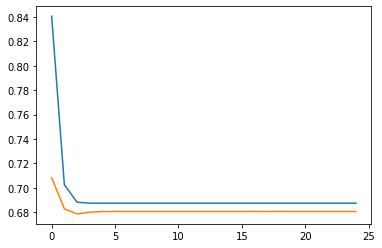

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_losses)

plt.plot(val_losses)
plt.show()

In [216]:
torch.sign(x@model.w + model.b).flatten().type(torch.int)

tensor([ 1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
        -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
         1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
         1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
        -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
        -1, -1,  1, -1, -1, -1,  1,  1,  1,  1], dtype=torch.int32)